In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns

In [54]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100000)

## Зареждане на данните

In [55]:
dataset = pd.read_csv('../data/bg-car-offers.csv')

In [56]:
dataset.sample(15)

Make    Model BodyType ManufactureDate      FuelType  \
30280           Ford    Focus    Комби         04/2016       Дизелов   
91724             VW     Golf   Хечбек         07/2008      Бензинов   
25022        Citroen      DS3   Хечбек         05/2017       Дизелов   
52322  Mercedes-Benz    E 350    Комби         06/2014       Дизелов   
61240         Nissan     Juke     Джип         09/2012      Бензинов   
75491        Renault   Megane    Комби         11/2003       Дизелов   
70728        Peugeot      308    Комби         07/2010       Дизелов   
28936           Ford    B-Max      Ван         08/2016      Бензинов   
59798     Mitsubishi      ASX     Джип         11/2017       Дизелов   
84216         Toyota  Avensis    Комби         06/2006       Дизелов   
37394        Hyundai   Tucson     Джип         02/2020      Хибриден   
468       Alfa Romeo       Gt     Купе         09/2004      Бензинов   
21630            BMW       i3   Хечбек         12/2020  Електрически   
85450         Toyota  Corolla    Седан         11/2023      Хибриден   
98761          Volvo      V40   Хечбек         02/2019       Дизелов   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  \
30280        Ръчна         NaN       85.00       Евро 6 115000.00   
91724        Ръчна     1600.00      102.00       Евро 4 204420.00   
25022        Ръчна     1600.00       75.00       Евро 6 122003.00   
52322  Автоматична     3000.00      258.00       Евро 6 225000.00   
61240  Автоматична     1600.00      190.00       Евро 5 189400.00   
75491        Ръчна     1900.00      101.00       Евро 2 299700.00   
70728        Ръчна     1600.00      109.00          NaN 234000.00   
28936        Ръчна      998.00       74.00       Евро 6 153500.00   
59798  Автоматична     2200.00      150.00       Евро 6 150000.00   
84216        Ръчна     2231.00      177.00       Евро 4 237000.00   
37394  Автоматична     2000.00      200.00       Евро 6 153360.00   
468          Ръчна     1970.00      165.00       Евро 4 185500.00   
21630  Автоматична         NaN      184.00          NaN  37500.00   
85450  Автоматична         NaN      140.00          NaN    450.00   
98761  Автоматична     1992.00      120.00       Евро 6 132000.00   

       MilesPerFullCharge (EV)  BatteryCapacity (EV)           Color  \
30280                      NaN                   NaN           Черен   
91724                      NaN                   NaN             Сив   
25022                      NaN                   NaN           Черен   
52322                      NaN                   NaN             Сив   
61240                      NaN                   NaN  Тъмно син мет.   
75491                      NaN                   NaN            Жълт   
70728                      NaN                   NaN           Черен   
28936                      NaN                   NaN          Червен   
59798                      NaN                   NaN             NaN   
84216                      NaN                   NaN         Златист   
37394                      NaN                   NaN          Червен   
468                        NaN                   NaN      Светло сив   
21630                   320.00                 42.20           Черен   
85450                      NaN                   NaN          Червен   
98761                      NaN                   NaN             Бял   

                     VIN      Price  \
30280                NaN      14700   
91724                NaN       7900   
25022                NaN  16624.555   
52322                NaN      29500   
61240                NaN      16250   
75491                NaN       2500   
70728                NaN       6800   
28936  WF0KXXERJKGG38120      10500   
59798                NaN      37500   
84216                NaN       4444   
37394                NaN      48999   
468                  NaN       4200   
21630  WBY8P610607H54576      52900   
85450                NaN      67999   
98761               

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99693 entries, 0 to 99692
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     99693 non-null  object 
 1   Model                    99693 non-null  object 
 2   BodyType                 99693 non-null  object 
 3   ManufactureDate          99535 non-null  object 
 4   FuelType                 99693 non-null  object 
 5   Transmission             99693 non-null  object 
 6   EngineSize               73390 non-null  float64
 7   Horsepower               94274 non-null  float64
 8   EuroStandard             77655 non-null  object 
 9   Mileage                  99281 non-null  float64
 10  MilesPerFullCharge (EV)  2713 non-null   float64
 11  BatteryCapacity (EV)     2713 non-null   float64
 12  Color                    94525 non-null  object 
 13  VIN                      10033 non-null  object 
 14  Price                 

In [58]:
dataset.shape

(99693, 26)

In [59]:
dataset.describe(include='all')

Make  Model BodyType ManufactureDate FuelType Transmission  \
count           99693  99693    99693           99535    99693        99693   
unique            111   1401       11             682        5            3   
top     Mercedes-Benz   Golf     Джип         10/2008  Дизелов  Автоматична   
freq            13678   2482    26169             628    54090        51292   
mean              NaN    NaN      NaN             NaN      NaN          NaN   
std               NaN    NaN      NaN             NaN      NaN          NaN   
min               NaN    NaN      NaN             NaN      NaN          NaN   
25%               NaN    NaN      NaN             NaN      NaN          NaN   
50%               NaN    NaN      NaN             NaN      NaN          NaN   
75%               NaN    NaN      NaN             NaN      NaN          NaN   
max               NaN    NaN      NaN             NaN      NaN          NaN   

        EngineSize  Horsepower EuroStandard    Mileage  \
count     73390.00    94274.00        77655   99281.00   
unique         NaN         NaN            6        NaN   
top            NaN         NaN       Евро 6        NaN   
freq           NaN         NaN        27057        NaN   
mean       2216.35      186.93          NaN  179730.93   
std        1433.42      125.41          NaN  148739.99   
min           1.00        1.00          NaN       1.00   
25%        1600.00      110.00          NaN  125635.00   
50%        2000.00      150.00          NaN  183000.00   
75%        2500.00      224.00          NaN  227150.00   
max       62000.00     2400.00          NaN 9999999.00   

        MilesPerFullCharge (EV)  BatteryCapacity (EV)  Color  \
count                   2713.00               2713.00  94525   
unique                      NaN                   NaN     41   
top                         NaN                   NaN  Черен   
freq                        NaN                   NaN  25519   
mean                     329.47                 57.55    NaN   
std                      199.09                102.51    NaN   
min                        1.00                  1.00    NaN   
25%                      150.00                 25.60    NaN   
50%                      350.00                 52.00    NaN   
75%                      470.00                 81.00    NaN   
max                     3100.00               5000.00    NaN   

                      VIN  Price  \
count               10033  99693   
unique              10033   7008   
top     ZFA3120000JD72908   6500   
freq                    1    888   
mean                  NaN    NaN   
std                   NaN    NaN   
min                   NaN    NaN   
25%                   NaN    NaN   
50%                   NaN    NaN   
75%                   NaN    NaN   
max                   NaN    NaN   

                                           SafetyFeatures  \
count                                               82213   
unique                                              11075   
top     GPS система за проследяване, Автоматичен контр...   
freq                                                 4149   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                           ComfortFeatures OtherFeatures  \
count                                85591         83842   
unique                               47830          2336   
top     Ел. Огледала, Ел. Стъкла, Климатик      Нов внос   
freq                                   404          5706   
mean                                   NaN           NaN   
std                                    NaN           NaN   
min             

## Обработка на целевата променлива - Цена

Първо трябва да превърнем цената в числова стойност: 

In [60]:
dataset['Price'].value_counts(dropna=False)

Price
6500                  888
При запитване         822
5500                  811
7500                  769
8500                  764
10500                 706
4500                  670
9500                  615
12500                 596
3500                  580
6000                  568
11500                 568
5000                  545
8000                  510
7000                  509
4000                  490
13500                 490
8999                  488
9999                  488
10000                 486
7999                  483
6999                  470
16500                 467
9000                  464
9900                  464
11000                 460
8900                  454
10900                 449
15500                 447
7900                  447
6900                  445
3000                  438
14500                 427
13900                 409
18500                 403
12000                 402
5900                  400
15000                 395
4200  

### Заместване на стойностите "При запитване" със средната цена за модела

In [61]:
dataset[dataset['Price'].str.contains('При запитване', case=False)]

Make               Model        BodyType ManufactureDate  \
0             Abarth                 595             Ван         07/1997   
214       Alfa Romeo                 159           Седан         01/2008   
395       Alfa Romeo           Giulietta          Хечбек         05/2011   
617     Aston martin          V8 Vantage          Хечбек             NaN   
636             Audi                 100  Стреч лимузина         01/1989   
637             Audi                 100  Стреч лимузина         02/1988   
638             Audi                 100  Стреч лимузина         07/1989   
640             Audi                  80          Кабрио         04/1996   
661             Audi                  80           Седан         01/1989   
667             Audi                  80           Седан         02/1994   
688             Audi                  80           Седан         07/1993   
811             Audi                  A2          Хечбек         03/2000   
1110            Audi                  A3          Хечбек         01/2010   
1480            Audi                  A3          Хечбек         07/2005   
1647            Audi                  A3          Хечбек         09/2005   
1893            Audi                  A3          Хечбек         11/2020   
2000            Audi                  A4          Кабрио         05/2004   
2359            Audi                  A4           Комби         04/2006   
2458            Audi                  A4           Комби         05/2003   
2638            Audi                  A4           Комби         06/2011   
2672            Audi                  A4           Комби         07/2000   
2914            Audi                  A4           Комби         09/1998   
3054            Audi                  A4           Комби         09/2017   
3089            Audi                  A4           Комби         10/2005   
3090            Audi                  A4           Комби         10/2005   
3499            Audi                  A4           Седан         01/2008   
4203            Audi                  A5          Кабрио         08/2010   
4213            Audi                  A5            Купе         01/2007   
4292            Audi                  A5            Купе         06/2008   
4563            Audi                  A5          Хечбек         06/2009   
4586            Audi                  A5          Хечбек         08/2013   
4984            Audi                  A6           Комби         06/1999   
5044            Audi                  A6           Комби         06/2019   
5058            Audi                  A6           Комби         07/2006   
5237            Audi                  A6           Комби         09/2012   
5288            Audi                  A6           Комби         10/2005   
5571            Audi                  A6           Седан         01/2012   
5711            Audi                  A6           Седан         04/2003   
5891            Audi                  A6           Седан         07/1997   
5956            Audi                  A6           Седан         08/2007   
6331            Audi          A6 Allroad           Комби         05/2007   
6356            Audi          A6 Allroad           Комби         06/2008   
6423            Audi          A6 Allroad           Комби         10/2005   
6741            Audi                  A7          Хечбек         06/2018   
6764            Audi                  A7          Хечбек         09/2013   
6816            Audi                  A8           Седан         01/2014   
7122            Audi                  A8           Седан         09/2019   
7191            Audi                  A8           Седан         11/2010   
7217            Audi                  A8           Седан         11/2017   
7218            Audi                  A8           Седан         11/2018   
7264            Audi                  A8           Седан         12/2017   
7265            Audi                  A8           Седан        

In [62]:
non_numeric_price_counts = dataset[~dataset['Price'].str.isdigit()]['Price'].value_counts().reset_index()
non_numeric_price_counts.columns = ['Price', 'Count']

non_numeric_price_counts

Price  Count
0          При запитване    822
1              107570.65     23
2               68454.05     22
3               48895.75     20
4      88012.34999999999     20
5                39116.6     17
6              146687.25     16
7                9779.15     16
8                78233.2     15
9               44984.09     14
10               19558.3     14
11           97789.54417     13
12              13690.81     13
13              15646.64     13
14           13688.85417     13
15             14081.976     12
16          107568.69417     12
17              84100.69     12
18             15059.891     12
19    58672.944169999995     12
20              215141.3     11
21           15644.68417     11
22             14668.725     11
23               97791.5     11
24    176024.69999999998     11
25              29337.45     11
26    224920.44999999998     11
27             16624.555     10
28               58674.9     10
29              8801.235      9
30              136908.1      9
31             134952.27      9
32              23469.96      9
33     72365.70999999999      9
34              86056.52      9
35           78231.24417      9
36             12712.895      9
37              43028.26      9
38           19556.34417      9
39              117349.8      9
40             22492.045      9
41              234699.6      9
42             244478.75      8
43              80189.03      8
44              95835.67      8
45          117347.84417      8
46              31293.28      8
47             185803.85      8
48          293372.54417      8
49             191671.34      8
50             10757.065      8
51    26403.704999999998      8
52             24447.875      7
53             232743.77      7
54    103658.98999999999      7
55              82144.86      7
56             101703.16      7
57          195581.04417      7
58              156466.4      7
59              54763.24      7
60              11734.98      7
61    144731.41999999998      7
62            390970.417      7
63             174068.87      7
64             20536.215      7
65              93879.84      7
66    193627.16999999998      7
67             152554.74      7
68          176022.74417      7
69          215139.34417      6
70             168201.38      6
71              62586.56      6
72           14666.76917      6
73              70409.88      6
74               7823.32      6
75              74321.54      6
76    13495.226999999999      6
77              89968.18      6
78             142775.59      6
79              17602.47      6
80              76277.37      6
81              273816.2      6
82              21514.13      6
83          123215.33417      5
84             14277.559      5
85              37160.77      5
86    254062.31699999998      5
87           14080.02017      5
88          312930.84417      5
89    121261.45999999999      5
90             187759.68      5
91            259929.807      5
92    29335.494169999998      5
93             127128.95      5
94    52807.409999999996      5
95             228832.11      5
96            175829.117      5
97             13886.393      5
98             154510.57      5
99    60630.729999999996      5
100         101701.20417      5
101            164289.72      5
102              5867.49      5
103   185801.89416999999      5
104            12321.729      5
105   162333.88999999998      5
106            132996.44      5
107            140819.76      5
108         125171.16417      5
109          84098.73417      5
110            420503.45      5
111   105614.81999999999      5
112            125173.12      5
113            166245.55      5
114         146685.29417      5
115            199494.66      4
116            34227.025      4
117             195583.0      4
118            55741.155      4
119             293374.5      4
120            92901.925      4
121             4889.575      4
122    704098.7999999999      4
123             50851.58      4
124             410

<Axes: title={'center': 'Брой обяви с некоректни цени'}, xlabel='Цена', ylabel='Брой обяви'>

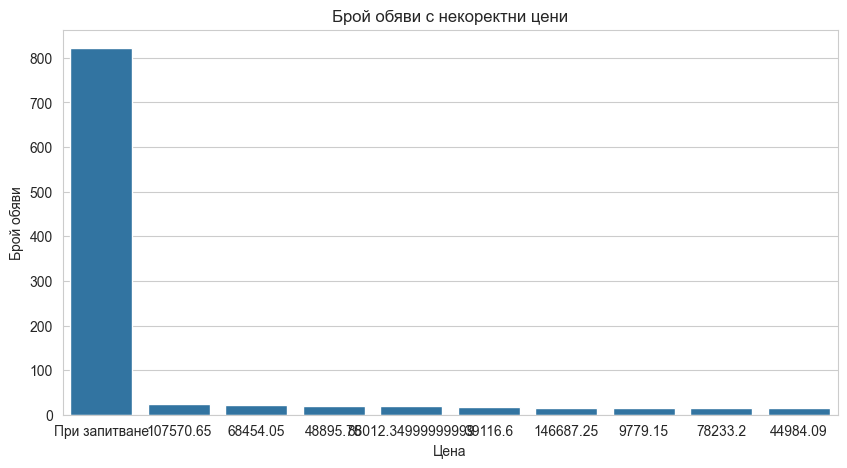

In [63]:
plt.figure(figsize=(10, 5))

plt.title('Брой обяви с некоректни цени')
plt.xlabel('Цена')
plt.ylabel('Брой обяви')
sns.barplot(x='Price', y='Count', data=non_numeric_price_counts.head(10))

In [64]:
prepared_dataset = dataset.copy()

# Replace USD prices with NaN
prepared_dataset.loc[prepared_dataset['Price'].str.contains('USD'), 'Price'] = np.nan

# Replace 'При запитване' with NaN
prepared_dataset.loc[prepared_dataset['Price'] == 'При запитване', 'Price'] = np.nan

# Convert to float in order to fill NaN values
prepared_dataset['Price'] = prepared_dataset['Price'].astype('float64').round()

# Fill NaN values with the mean by model
prepared_dataset['Price'] = prepared_dataset.groupby('Model')['Price'].transform(lambda x: x.fillna(x.mean()))

prepared_dataset['Price'].value_counts(dropna=False)

Price
6500.00        888
5500.00        811
7500.00        769
8500.00        764
10500.00       707
4500.00        671
9500.00        615
12500.00       596
3500.00        580
11500.00       569
6000.00        568
5000.00        545
8000.00        510
7000.00        509
13500.00       490
4000.00        490
9999.00        488
8999.00        488
10000.00       486
7999.00        483
6999.00        471
16500.00       467
9000.00        464
9900.00        464
11000.00       461
8900.00        454
10900.00       449
15500.00       447
7900.00        447
6900.00        445
3000.00        438
14500.00       427
13900.00       409
18500.00       403
12000.00       402
5900.00        400
15000.00       395
4200.00        391
12900.00       374
6300.00        374
2500.00        369
5999.00        364
11900.00       352
25000.00       351
10999.00       347
5800.00        346
16900.00       344
6800.00        344
17500.00       343
11999.00       342
4999.00        341
12999.00       332
4900.0

In [65]:
prepared_dataset['Price'].isna().sum()

np.int64(3)

In [66]:
prepared_dataset[prepared_dataset['Price'].isna()]

Make   Model BodyType ManufactureDate  FuelType Transmission  \
17746    BMW  Izetta     Купе         11/1958  Бензинов        Ръчна   
40008    Kia      K9    Седан         02/2015  Бензинов  Автоматична   
98412  Volga   Siber  Линейка         12/1994  Бензинов        Ръчна   

       EngineSize  Horsepower EuroStandard   Mileage  MilesPerFullCharge (EV)  \
17746         NaN       13.00       Евро 1  40000.00                      NaN   
40008     5038.00      420.00       Евро 6 130000.00                      NaN   
98412         NaN         NaN          NaN  10000.00                      NaN   

       BatteryCapacity (EV)  Color                VIN  Price  \
17746                   NaN  Бежов                NaN    NaN   
40008                   NaN  Черен  KNALW4D44F6021632    NaN   
98412                   NaN    NaN                NaN    NaN   

                                          SafetyFeatures  \
17746                                                NaN   
40008  Автоматичен контрол на стабилността, Антиблоки...   
98412                                                NaN   

                                         ComfortFeatures  \
17746                                                NaN   
40008  Bluetooth \ handsfree система, USB, audio\vide...   
98412                                                NaN   

               OtherFeatures  \
17746                    NaN   
40008  Бартер, С регистрация   
98412                    NaN   

                                        ExteriorFeatures SecurityFeatures  \
17746                                                NaN              NaN   
40008  LED фарове, Лети джанти, Металик, Панорамен лю...              NaN   
98412                                                NaN              NaN   

      InteriorFeatures SpecialisedFeatures   Region         City  ViewCount  \
17746              NaN                 NaN    София    гр. София       1180   
40008      Кожен салон                 NaN  Пловдив  гр. Карлово       3171   
98412              NaN                 NaN    София          NaN      76955   

                  OfferTitle  
17746         BMW Izetta 250  
40008   Kia K9 Luxury 5.0 V8  
98412  Volga Siber ГАЗ 31023

In [67]:
# Drop rows still with nan Price
prepared_dataset = prepared_dataset.dropna(subset=['Price'])

prepared_dataset['Price'].notna().sum()

np.int64(99690)

In [68]:
prepared_dataset['Price'].isna().sum()

np.int64(0)

In [69]:
prepared_dataset['Price'].value_counts(dropna=False)

Price
6500.00        888
5500.00        811
7500.00        769
8500.00        764
10500.00       707
4500.00        671
9500.00        615
12500.00       596
3500.00        580
11500.00       569
6000.00        568
5000.00        545
8000.00        510
7000.00        509
13500.00       490
4000.00        490
8999.00        488
9999.00        488
10000.00       486
7999.00        483
6999.00        471
16500.00       467
9000.00        464
9900.00        464
11000.00       461
8900.00        454
10900.00       449
15500.00       447
7900.00        447
6900.00        445
3000.00        438
14500.00       427
13900.00       409
18500.00       403
12000.00       402
5900.00        400
15000.00       395
4200.00        391
12900.00       374
6300.00        374
2500.00        369
5999.00        364
11900.00       352
25000.00       351
10999.00       347
5800.00        346
6800.00        344
16900.00       344
17500.00       343
11999.00       342
4999.00        341
12999.00       332
4900.0

In [70]:
prepared_dataset[prepared_dataset['Price'] == 'При запитване']

Empty DataFrame
Columns: [Make, Model, BodyType, ManufactureDate, FuelType, Transmission, EngineSize, Horsepower, EuroStandard, Mileage, MilesPerFullCharge (EV), BatteryCapacity (EV), Color, VIN, Price, SafetyFeatures, ComfortFeatures, OtherFeatures, ExteriorFeatures, SecurityFeatures, InteriorFeatures, SpecialisedFeatures, Region, City, ViewCount, OfferTitle]
Index: []

In [71]:
prepared_dataset['Price'].describe()

count      99690.00
mean       32155.52
std        90954.40
min           11.00
25%         7790.00
50%        15000.00
75%        33000.00
max     19558298.00
Name: Price, dtype: float64

In [72]:
prepared_dataset['Price'].dtype

dtype('float64')

Вече колоната `Price` е с числов тип данни и няма липсващи стойности. Можем да продължим с обучение на базов модел без подготовка на данните.

## Премахване на колоните, които няма да използваме за предсказване на цената

Ще премахнем колоните, които нямат отношение към състоянието на автомобила - `ViewCount`, `OfferTitle`, `VIN`, `Region` и `City`.

In [73]:
prepared_dataset = prepared_dataset.drop(columns=['OfferTitle', 'ViewCount', 'VIN', 'City'])
prepared_dataset.columns

Index(['Make', 'Model', 'BodyType', 'ManufactureDate', 'FuelType',
       'Transmission', 'EngineSize', 'Horsepower', 'EuroStandard', 'Mileage',
       'MilesPerFullCharge (EV)', 'BatteryCapacity (EV)', 'Color', 'Price',
       'SafetyFeatures', 'ComfortFeatures', 'OtherFeatures',
       'ExteriorFeatures', 'SecurityFeatures', 'InteriorFeatures',
       'SpecialisedFeatures', 'Region'],
      dtype='object')

Text(0, 0.5, 'Колона')

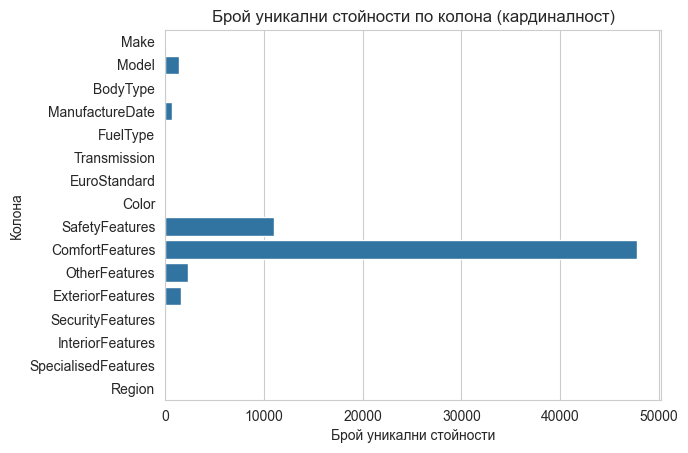

In [74]:
sns.barplot(x=prepared_dataset.select_dtypes(include=[object]).nunique(),
            y=prepared_dataset.select_dtypes(include=[object]).columns)
plt.title('Брой уникални стойности по колона (кардиналност)')
plt.xlabel('Брой уникални стойности')
plt.ylabel('Колона')

## Обработка на липсващи данни

<Axes: title={'center': 'Липсващи стойности по колона'}, xlabel='Брой липсващи стойности', ylabel='Колона'>

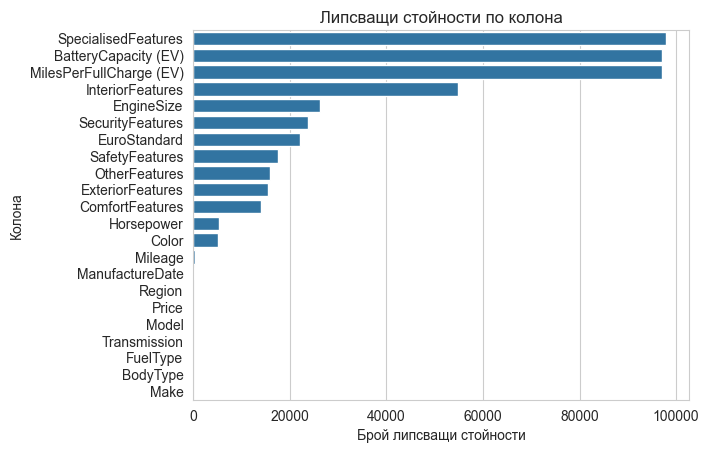

In [75]:
null_counts_per_column = prepared_dataset.isnull().sum().sort_values(ascending=False)

plt.title('Липсващи стойности по колона')
plt.xlabel('Брой липсващи стойности')
plt.ylabel('Колона')
sns.barplot(x=null_counts_per_column, y=null_counts_per_column.index)

<Axes: >

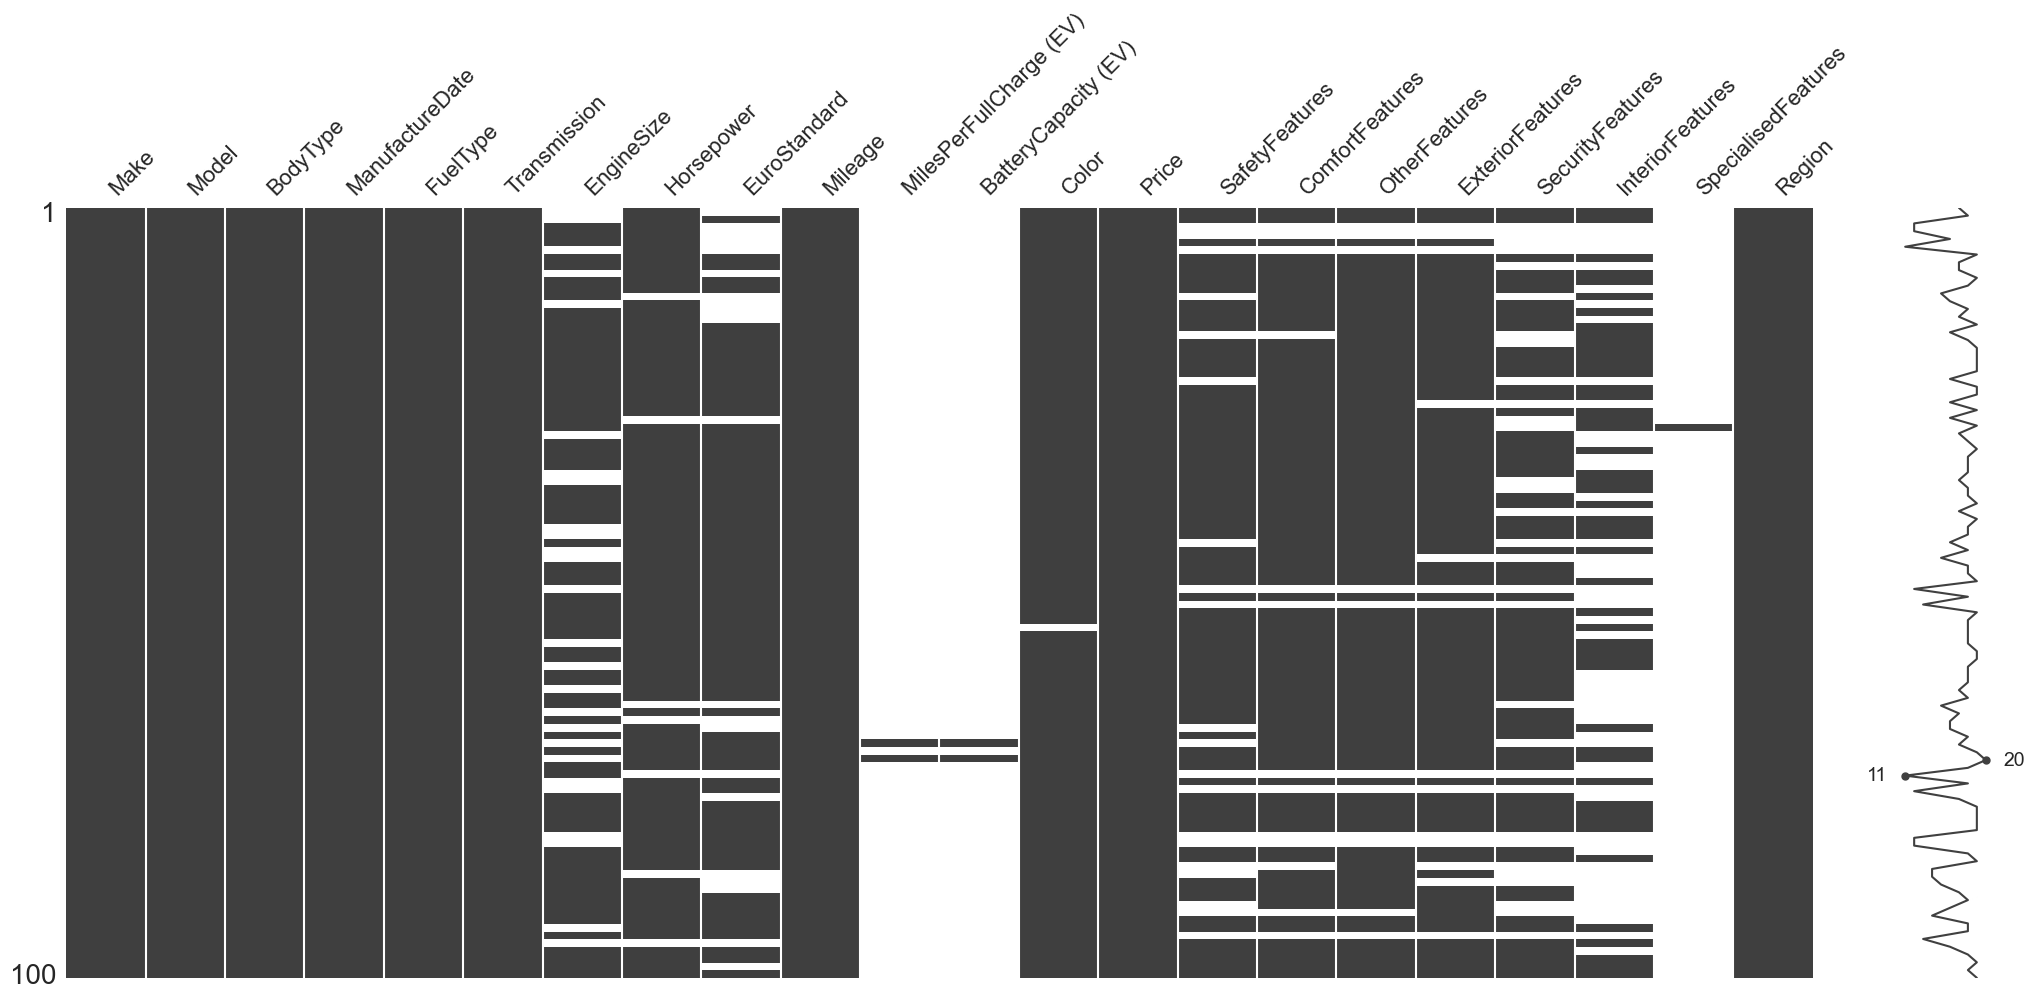

In [76]:
msno.matrix(prepared_dataset.sample(100))

<Axes: >

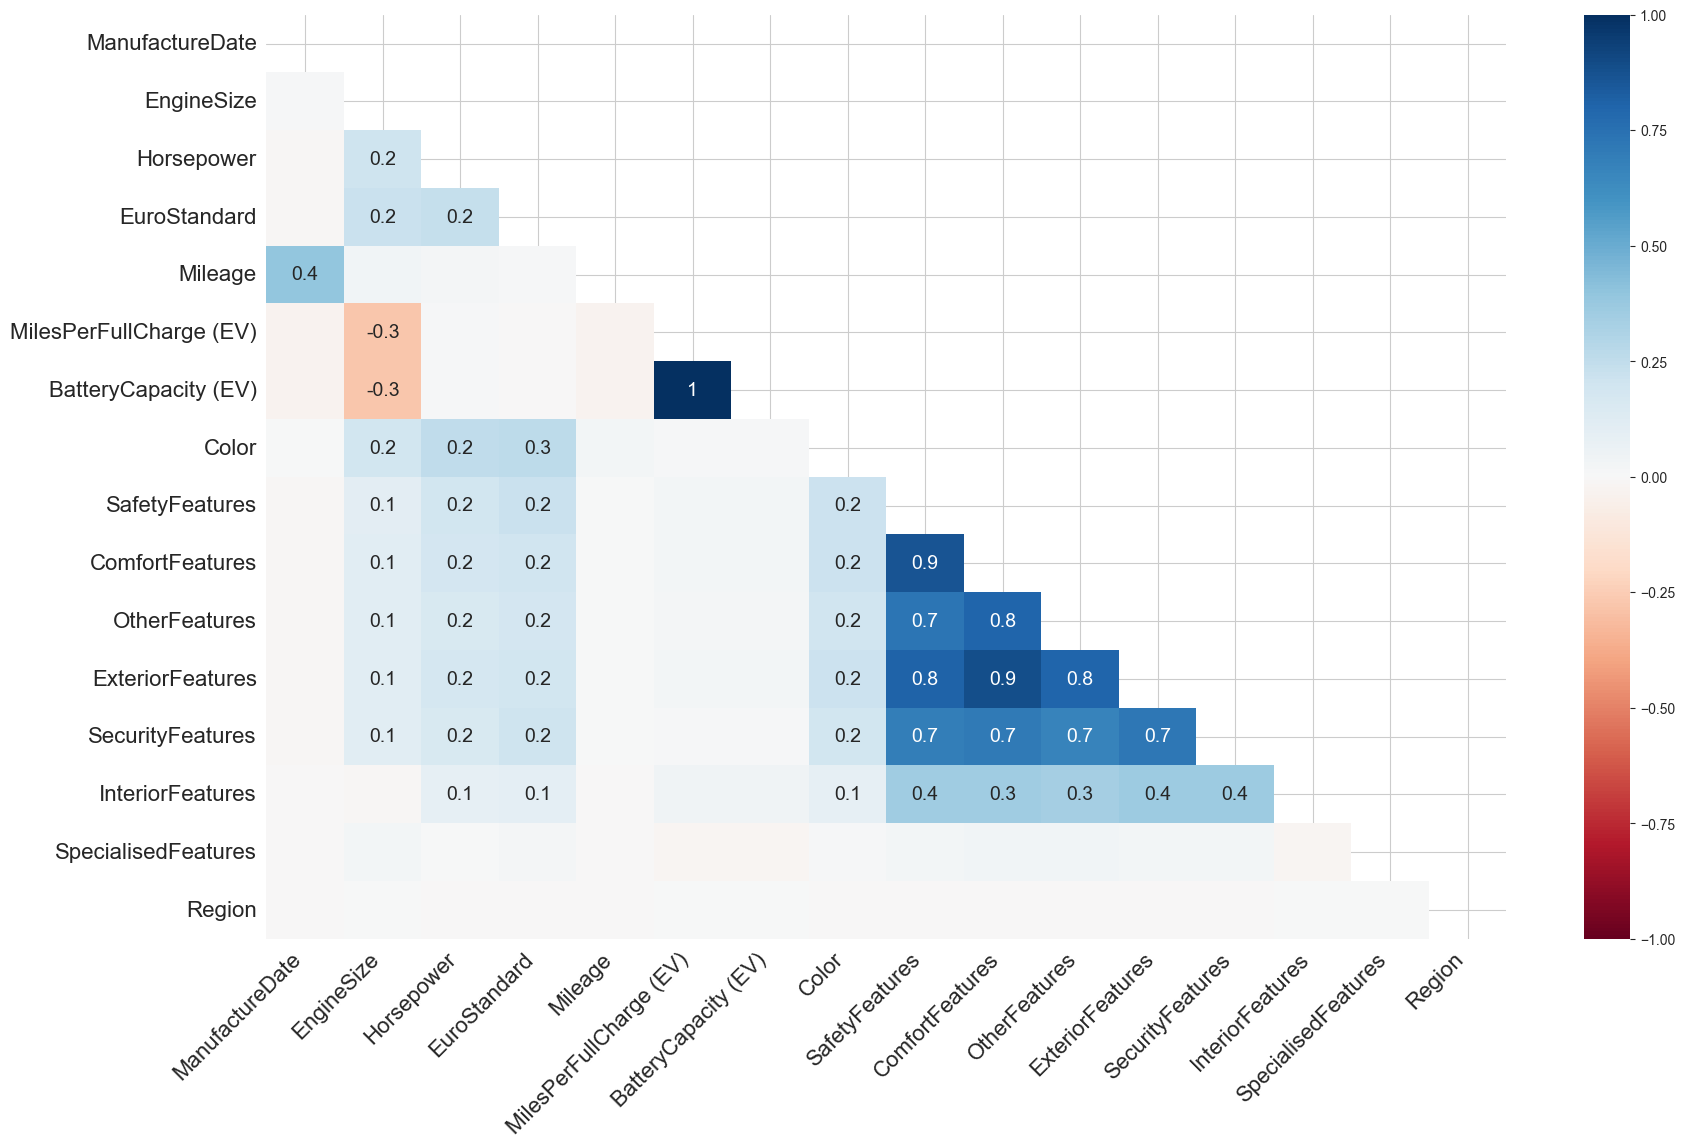

In [77]:
msno.heatmap(prepared_dataset)

# **Наблюдения:**
* Ако имаме данни за размер на двигателя, вероятно няма да имаме данни в колоните за ел. автомобили.
* Колоните за ел. автомобили винаги присъстват заедно.
* Почти винаги колоните за екстри присъстват заедно (авторът на обявата или попълва всички екстри, или не попълва нито една).
* Област и град почти винаги присъстват зедно.

In [78]:
prepared_dataset.select_dtypes(include=[object]).columns

Index(['Make', 'Model', 'BodyType', 'ManufactureDate', 'FuelType',
       'Transmission', 'EuroStandard', 'Color', 'SafetyFeatures',
       'ComfortFeatures', 'OtherFeatures', 'ExteriorFeatures',
       'SecurityFeatures', 'InteriorFeatures', 'SpecialisedFeatures',
       'Region'],
      dtype='object')

In [79]:
prepared_dataset.select_dtypes(include=[np.number]).columns

Index(['EngineSize', 'Horsepower', 'Mileage', 'MilesPerFullCharge (EV)',
       'BatteryCapacity (EV)', 'Price'],
      dtype='object')

In [80]:
# Drop only if all car features are missing (not entered by author) i.e we don't know if they are present or not, so we cannot train with them
columns_to_drop_na = [
    'SafetyFeatures', 'ComfortFeatures', 'OtherFeatures',
    'ExteriorFeatures', 'SecurityFeatures', 'InteriorFeatures'
]
df_cleaned_nans = prepared_dataset.dropna(subset=columns_to_drop_na, how='all')

df_cleaned_nans = df_cleaned_nans.dropna(subset=['Mileage', 'Horsepower', 'ManufactureDate'])

Text(0, 0.5, 'Колона')

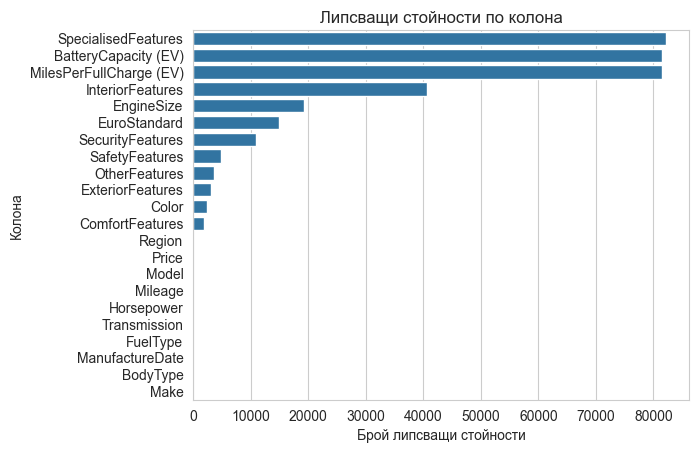

In [81]:
null_counts_per_column = df_cleaned_nans.isnull().sum().sort_values(ascending=False)

sns.barplot(x=null_counts_per_column, y=null_counts_per_column.index)
plt.title('Липсващи стойности по колона')
plt.xlabel('Брой липсващи стойности')
plt.ylabel('Колона')

In [82]:
df_cleaned_nans.shape

(83823, 22)

## Премахване на аутлайъри

При анализа на набора от данни установихме стойности в числовите колони, които са аутлайъри или грешно въведени данни. Нека премахнем тези стойности.

### Премахване на аутлайъри в колоната `Price`

В анализа на данните открихме, че съществуват доста обяви с много високи цени. Нека проверим дали премахването им ще намали грешката на референтния модел.

In [83]:
df_cleaned_nans['Price'] = df_cleaned_nans['Price'].round()
df_cleaned_nans['Price'].describe()

count      83823.00
mean       33807.97
std        90990.72
min           11.00
25%         8400.00
50%        15999.00
75%        34900.00
max     19558298.00
Name: Price, dtype: float64

In [84]:
df_cleaned_nans.sample(10)

Make    Model BodyType ManufactureDate  FuelType Transmission  \
66173           Opel    Corsa   Хечбек         12/2012  Бензинов        Ръчна   
26752       Daihatsu   Feroza     Джип         11/1992  Бензинов        Ръчна   
41165            Kia   Stonic     Джип         06/2019  Бензинов        Ръчна   
11132            BMW  3-серия    Комби         02/2005   Дизелов        Ръчна   
16886            BMW      640    Седан         09/2016   Дизелов  Автоматична   
49339  Mercedes-Benz  C-класа    Седан         06/2008   Дизелов  Автоматична   
25832          Dacia   Duster     Джип         07/2017   Дизелов        Ръчна   
67891           Opel   Zafira      Ван         02/2008  Бензинов        Ръчна   
49186  Mercedes-Benz  C-класа    Седан         01/2020   Дизелов  Автоматична   
1276            Audi       A3   Хечбек         04/2006  Бензинов  Автоматична   

       EngineSize  Horsepower EuroStandard   Mileage  MilesPerFullCharge (EV)  \
66173     1400.00       87.00       Евро 5 114000.00                      NaN   
26752     1600.00       96.00       Евро 3  42000.00                      NaN   
41165     1000.00      120.00       Евро 6  99000.00                      NaN   
11132     2000.00      150.00       Евро 4 247000.00                      NaN   
16886         NaN      313.00       Евро 6 137000.00                      NaN   
49339     2200.00      170.00          NaN 317085.00                      NaN   
25832         NaN      110.00       Евро 6 159000.00                      NaN   
67891     1600.00       94.00       Евро 4 234000.00                      NaN   
49186         NaN      194.00       Евро 6 237000.00                      NaN   
1276      2000.00      200.00          NaN 213000.00                      NaN   

       BatteryCapacity (EV)      Color    Price  \
66173                   NaN      Черен 10900.00   
26752                   NaN  Тъмно сив 10300.00   
41165                   NaN     Графит 23500.00   
11132                   NaN        Сив  6350.00   
16886                   NaN      Черен 65999.00   
49339                   NaN        Сив 13999.00   
25832                   NaN        Бял 15300.00   
67891                   NaN        Сив  6000.00   
49186                   NaN  Тъмно сив 42000.00   
1276                    NaN      Черен  8999.00   

                                          SafetyFeatures  \
66173  Автоматичен контрол на стабилността, Антиблоки...   
26752  Антиблокираща система, Система за защита от пр...   
41165  GPS система за проследяване, Автоматичен контр...   
11132  GPS система за проследяване, Автоматичен контр...   
16886  GPS система за проследяване, Автоматичен контр...   
49339  Антиблокираща система, Въздушни възглавници - ...   
25832  Антиблокираща система, Въздушни възглавници - ...   
67891  Автоматичен контрол на стабилността, Антиблоки...   
49186  GPS система за проследяване, Автоматичен контр...   
1276   Антиблокираща система, Въздушни възглавници - ...   

                                         ComfortFeatures  \
66173  Auto Start Stop function, Bluetooth \ handsfre...   
26752  Блокаж на диференциала, Бордкомпютър, Бързи \ ...   
41165  Auto Start Stop function, Bluetooth \ handsfre...   
11132  Bluetooth \ handsfree система, DVD, TV, Бордко...   
16886  Auto Start Stop function, Bluetooth \ handsfre...   
49339  Bluetooth \ handsfree система, USB, audio\vide...   
25832  Bluetooth \ handsfree система, Бордкомпютър, Д...   
67891  Ел. Огледала, Ел. Стъкла, Климатроник, Мултифу...   
49186  Auto Start Stop function, Bluetooth \ handsfre...   
1276   Steptronic, Tiptronic, Блокаж на диференциала,...   

                                           OtherFeatures  \
66173                  Лизинг, Нов внос, Сервизна книжка   
26752  4x4, Бартер, Газова уредба, Къса база, Напълно...   
41165                Buy back, Нов внос, Сервизна книжка   
11132                                                NaN   
16886  4x4, Напълно обслужен, С регистрация, Сер

In [85]:
no_price_outliers = df_cleaned_nans[(df_cleaned_nans['Price'] > 500) & (df_cleaned_nans['Price'] <= 500000)]
no_price_outliers['Price'].describe()

count    83609.00
mean     32037.07
std      47291.63
min        600.00
25%       8399.00
50%      15990.00
75%      34700.00
max     499999.00
Name: Price, dtype: float64

In [86]:
no_outliers_df = no_price_outliers

### Премахване на аутлайери в колоната `EngineSize`

In [87]:
no_outliers_df[no_outliers_df.select_dtypes(include=np.number).columns].describe()

EngineSize  Horsepower    Mileage  MilesPerFullCharge (EV)  \
count    64388.00    83609.00   83609.00                  2369.00   
mean      2207.17      186.17  176114.53                   330.07   
std       1356.86      118.77  127439.41                   186.67   
min          1.00        1.00       1.00                     1.00   
25%       1600.00      112.00  125000.00                   150.00   
50%       2000.00      150.00  181235.00                   350.00   
75%       2500.00      224.00  223900.00                   476.00   
max      62000.00     2400.00 9999999.00                   881.00   

       BatteryCapacity (EV)     Price  
count               2369.00  83609.00  
mean                  57.99  32037.07  
std                  108.75  47291.63  
min                    1.00    600.00  
25%                   25.70   8399.00  
50%                   52.00  15990.00  
75%                   82.00  34700.00  
max                 5000.00 499999.00

In [88]:
no_outliers_df = no_outliers_df[
    ((no_outliers_df['EngineSize'] >= 500) & (no_outliers_df['EngineSize'] <= 9000)) | 
    (no_outliers_df['EngineSize'].isna())]

no_outliers_df = no_outliers_df[
    ((no_outliers_df['MilesPerFullCharge (EV)'] >= 10) & (no_outliers_df['MilesPerFullCharge (EV)'] <= 900)) | 
    (no_outliers_df['MilesPerFullCharge (EV)'].isna())]

no_outliers_df = no_outliers_df[(no_outliers_df['Horsepower'] >= 10) & (no_outliers_df['Horsepower'] <= 800)]
no_outliers_df = no_outliers_df[(no_outliers_df['Mileage'] >= 0) & (no_outliers_df['Mileage'] <= 700000)]

no_outliers_df = no_outliers_df[
    ((no_outliers_df['BatteryCapacity (EV)'] >= 0) & (no_outliers_df['BatteryCapacity (EV)'] <= 120)) | 
    (no_outliers_df['BatteryCapacity (EV)'].isna())]

no_outliers_df = no_outliers_df[(~no_outliers_df['Region'].str.contains('извън', case=False, na=False)) | no_outliers_df['Region'].isna()]

In [89]:
no_outliers_df[no_outliers_df.select_dtypes(include=np.number).columns].describe()

EngineSize  Horsepower   Mileage  MilesPerFullCharge (EV)  \
count    63572.00    82389.00  82389.00                  2319.00   
mean      2177.60      183.83 173648.30                   330.33   
std        838.23      106.51  82224.77                   185.52   
min        500.00       10.00      1.00                    15.00   
25%       1600.00      112.00 126000.00                   150.00   
50%       2000.00      150.00 181500.00                   350.00   
75%       2500.00      224.00 223500.00                   472.00   
max       8277.00      800.00 700000.00                   881.00   

       BatteryCapacity (EV)     Price  
count               2319.00  82389.00  
mean                  54.52  31597.98  
std                   31.47  46212.21  
min                    1.00    600.00  
25%                   25.70   8399.00  
50%                   52.00  15900.00  
75%                   80.85  34000.00  
max                  120.00 499999.00

In [90]:
no_outliers_df.shape

(82389, 22)

## Обработка и трансформиране на характеристиките

### Разделяне на колоните с екстри на автомобилите

Разделянето на екстрите в самостоятелна колона за всяка екстра ще позволи на нашия модел да открие по-точно зависимостта между наличието на дадена екстра и цената на автомобила.

In [91]:
features_columns = no_outliers_df.filter(like='Features').columns

no_outliers_df[features_columns].sample(10)

SafetyFeatures  \
69067  Антиблокираща система, Въздушни възглавници - ...   
79940  GPS система за проследяване, Автоматичен контр...   
29076  Въздушни възглавници - Предни, Въздушни възгла...   
29224  Автоматичен контрол на стабилността, Адаптивни...   
54871  Адаптивни предни светлини, Антиблокираща систе...   
1299                                          Парктроник   
52567  Въздушни възглавници - Задни, Въздушни възглав...   
4883   GPS система за проследяване, Автоматичен контр...   
67318  Антиблокираща система, Въздушни възглавници - ...   
80023  Антиблокираща система, Въздушни възглавници - ...   

                                         ComfortFeatures  \
69067  DVD, TV, USB, audio\video, IN\AUX изводи, Борд...   
79940  Bluetooth \ handsfree система, USB, audio\vide...   
29076  Бордкомпютър, Датчик за светлина, Ел. Огледала...   
29224  USB, audio\video, IN\AUX изводи, Бордкомпютър,...   
54871  Auto Start Stop function, Bluetooth \ handsfre...   
1299   USB, audio\video, IN\AUX изводи, Бордкомпютър,...   
52567  Bluetooth \ handsfree система, USB, audio\vide...   
4883   Bluetooth \ handsfree система, DVD, TV, Steptr...   
67318  Bluetooth \ handsfree система, Блокаж на дифер...   
80023  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климат...   

                                          OtherFeatures  \
69067                          Бартер, Лизинг, Нов внос   
79940  Напълно обслужен, С регистрация, Сервизна книжка   
29076                                          Нов внос   
29224       Buy back, Лизинг, Нов внос, Сервизна книжка   
54871                             4x4, Бартер, Нов внос   
1299                                           Нов внос   
52567                        Напълно обслужен, Нов внос   
4883                                      4x4, Нов внос   
67318                         Нов внос, Сервизна книжка   
80023                                          Нов внос   

                                        ExteriorFeatures  \
69067                       4(5) Врати, Халогенни фарове   
79940       4(5) Врати, LED фарове, Лети джанти, Металик   
29076  4(5) Врати, Лети джанти, Металик, Панорамен лю...   
29224              4(5) Врати, Металик, Халогенни фарове   
54871        4(5) Врати, LED фарове, Лети джанти, Теглич   
1299   4(5) Врати, LED фарове, Ксенонови фарове, Лети...   
52567  4(5) Врати, LED фарове, Ксенонови фарове, Лети...   
4883   4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
67318  4(5) Врати, Лети джанти, Металик, Халогенни фа...   
80023  4(5) Врати, Лети джанти, Металик, Халогенни фа...   

                   SecurityFeatures            InteriorFeatures  \
69067  Аларма, Централно заключване                         NaN   
79940   Каско, Централно заключване                         NaN   
29076  Аларма, Централно заключване                 Кожен салон   
29224          Централно заключване                         NaN   
54871          Централно заключване  Велурен салон, Кожен салон   
1299           Централно заключване                         NaN   
52567                        Аларма                 Кожен салон   
4883   Аларма, Централно заключване                 Кожен салон   
67318  Аларма, Централно заключване                         NaN   
80023          Централно заключване                         NaN   

      SpecialisedFeatures  
69067                 NaN  
79940                 NaN  
29076                 NaN  
29224                 NaN  
54871                 NaN  
1299                  NaN  
52567                 NaN  
4883                  NaN  
67318                 NaN  
80023                 NaN

In [92]:
df_with_expanded_extras = no_outliers_df.copy()

df_with_expanded_extras[features_columns] = df_with_expanded_extras[features_columns].fillna('')

for column in features_columns:
    df_with_expanded_extras = df_with_expanded_extras.join(
        df_with_expanded_extras[column].str.get_dummies(sep=', ').add_prefix(column + '_'))

df_with_expanded_extras = df_with_expanded_extras.drop(columns=features_columns)

df_with_expanded_extras.sample(10)

Make           Model BodyType ManufactureDate  FuelType  \
11262         BMW         3-серия    Комби         05/2005   Дизелов   
69738     Peugeot             208   Хечбек         12/2013  Бензинов   
19169         BMW              X3     Джип         10/2023   Дизелов   
303    Alfa Romeo  159 sportwagon    Комби         09/2006   Дизелов   
37675     Hyundai        Veloster     Купе         11/2014  Бензинов   
17128         BMW         7-серия    Седан         05/2016  Бензинов   
65417        Opel           Combo    Пикап         09/2012   Дизелов   
91067          VW            Golf   Хечбек         03/2005   Дизелов   
84519      Toyota         Avensis    Седан         02/2008   Дизелов   
5760         Audi              A6    Седан         05/2004  Бензинов   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  \
11262        Ръчна     2000.00      150.00       Евро 4 275034.00   
69738        Ръчна     1400.00       95.00       Евро 5 263260.00   
19169  Автоматична         NaN      340.00       Евро 6   5000.00   
303    Автоматична     1900.00      150.00       Евро 4 222222.00   
37675  Автоматична     1600.00      184.00       Евро 6 180000.00   
17128  Автоматична         NaN      444.00       Евро 6 164500.00   
65417        Ръчна         NaN       90.00       Евро 5 241000.00   
91067        Ръчна         NaN      105.00       Евро 4 267382.00   
84519        Ръчна         NaN      126.00       Евро 5 217000.00   
5760         Ръчна     2400.00      177.00       Евро 4 258000.00   

       MilesPerFullCharge (EV)  BatteryCapacity (EV)    Color     Price  \
11262                      NaN                   NaN    Черен   5200.00   
69738                      NaN                   NaN  Металик   8498.00   
19169                      NaN                   NaN    Черен 147590.00   
303                        NaN                   NaN    Черен   9000.00   
37675                      NaN                   NaN      Бял  23350.00   
17128                      NaN                   NaN    Черен  62000.00   
65417                      NaN                   NaN    Черен   6500.00   
91067                      NaN                   NaN      Сив   7444.00   
84519                      NaN                   NaN  Металик   9800.00   
5760                       NaN                   NaN      Сив   7000.00   

             Region  SafetyFeatures_GPS система за проследяване  \
11262   Благоевград                                           0   
69738         София                                           0   
19169         София                                           1   
303           София                                           1   
37675         София                                           0   
17128  Стара Загора                                           1   
65417         София                                           0   
91067       Пловдив                                           0   
84519        Бургас                                           0   
5760        Пловдив                                           0   

       SafetyFeatures_Автоматичен контрол на стабилността  \
11262                                                  1    
69738                                                  1    
19169                                                  1    
303                                                    1    
37675                                                  0    
17128                                                  1    
65417                                                  0    
91067                                                  1    
84519                                                  1    
5760                                                   0    

       SafetyFeatures_Адаптивни предни светлини  \
11262                                         0   
69738                                         0   
19169                                         1   
303                 

In [93]:
df_with_expanded_extras.shape

(82389, 114)

In [94]:
df_with_expanded_extras.dtypes

Make                                                            object
Model                                                           object
BodyType                                                        object
ManufactureDate                                                 object
FuelType                                                        object
Transmission                                                    object
EngineSize                                                     float64
Horsepower                                                     float64
EuroStandard                                                    object
Mileage                                                        float64
MilesPerFullCharge (EV)                                        float64
BatteryCapacity (EV)                                           float64
Color                                                           object
Price                                                          float64
Region

## Създаване на нова характеристика - `Age`

In [95]:
df_with_expanded_extras['ManufactureDate'].sample(10)

64113    07/2011
48731    07/2008
25811    06/2018
88620    07/2008
54184    06/2015
73418    12/2019
57107    10/2006
56914    10/2014
61514    02/2017
66322    01/2020
Name: ManufactureDate, dtype: object

В сегашния формат колоната съдържа текстови данни, показващи месеца и годината на производство на автомобила. Полезната информация, която всъщност извличаме от тази колона е възрастта на автомобила. Можем да преобразуваме тази колона в нова числова характеристика - `Age`, която би била в силна отрицателна корелация с цената и би била по-лесна за интерпретиране от модела.

In [96]:
from datetime import datetime

df_with_car_age = df_with_expanded_extras.dropna(subset=['ManufactureDate'])
df_with_car_age['Age'] = datetime.now().year - df_with_car_age['ManufactureDate'].str.split('/').str[1].astype('int')

df_with_car_age['Age'].sample(10)

47182    18
35113    21
11737    14
11300    26
19733     9
58719     3
39089    15
66517     6
78077     0
89198     8
Name: Age, dtype: int64

In [97]:
df_with_car_age['Age'].describe()

count   82389.00
mean       12.71
std         6.52
min         0.00
25%         8.00
50%        13.00
75%        17.00
max        86.00
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Price'>

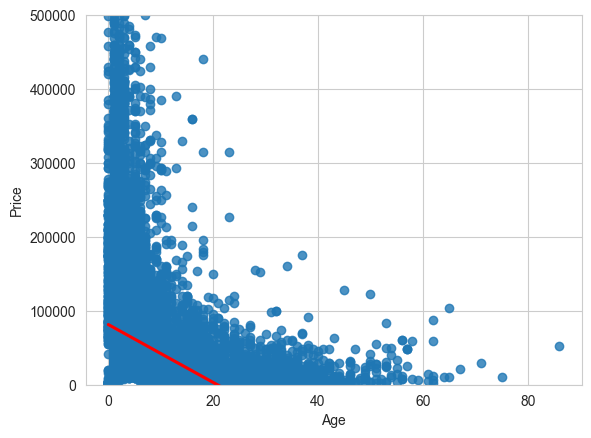

In [98]:
plt.ylim(0, 500000)
sns.regplot(x='Age', y='Price', data=df_with_car_age, line_kws={'color': 'red'})

In [99]:
df_with_car_age = df_with_car_age.drop(columns=['ManufactureDate'])

### Създаване на нови характеристики - `TotalComfortFeatures`, `TotalSafetyFeatures`, `TotalExteriorFeatures`, `TotalInteriorFeatures`, `TotalSecurityFeatures`, `TotalOtherFeatures`, `TotalSpecialisedFeatures`

In [100]:
df_with_total_features = df_with_car_age.copy()

for column in prepared_dataset.filter(like='Features').columns:
    df_with_total_features[f'Total{column}'] = df_with_total_features.filter(like=column).sum(axis=1)
    
df_with_total_features.sample(10)

Make         Model BodyType  FuelType Transmission  EngineSize  \
38343     Jeep      Cherokee     Джип   Дизелов  Автоматична     2776.00   
77832     Seat          Leon   Хечбек   Дизелов        Ръчна     2000.00   
86309   Toyota  Land cruiser     Джип   Дизелов        Ръчна     3000.00   
86977   Toyota          Rav4     Джип   Дизелов        Ръчна     2200.00   
24043  Citroen            C4   Хечбек   Дизелов        Ръчна     1600.00   
11232      BMW       3-серия    Комби   Дизелов  Автоматична     2000.00   
32095     Ford        Ranger    Пикап  Бензинов  Автоматична     2300.00   
75706  Renault        Megane   Хечбек   Дизелов        Ръчна     1461.00   
71063  Peugeot           308   Хечбек   Дизелов        Ръчна     1600.00   
69786  Peugeot          3008      Ван   Дизелов        Ръчна     1600.00   

       Horsepower EuroStandard   Mileage  MilesPerFullCharge (EV)  \
38343      150.00       Евро 3 192321.00                      NaN   
77832      140.00       Евро 4 132000.00                      NaN   
86309      125.00       Евро 2 138000.00                      NaN   
86977      136.00       Евро 4 162000.00                      NaN   
24043       90.00       Евро 4 171323.00                      NaN   
11232      177.00       Евро 5 231000.00                      NaN   
32095      270.00       Евро 6  50811.00                      NaN   
75706       90.00       Евро 6 117000.00                      NaN   
71063      100.00       Евро 6 154000.00                      NaN   
69786      114.00       Евро 5 134500.00                      NaN   

       BatteryCapacity (EV)       Color    Price          Region  \
38343                   NaN  Светло сив  6700.00    Стара Загора   
77832                   NaN         Сив  8500.00     Благоевград   
86309                   NaN       Зелен 24500.00           София   
86977                   NaN   Тъмно сив 11900.00          Сливен   
24043                   NaN       Черен  5500.00    Стара Загора   
11232                   NaN      Графит 10900.00         Дупница   
32095                   NaN         Сив 68900.00           София   
75706                   NaN         Бял 19500.00           София   
71063                   NaN         Бял 14999.00  Велико Търново   
69786                   NaN      Графит 15990.00           Враца   

       SafetyFeatures_GPS система за проследяване  \
38343                                           0   
77832                                           0   
86309                                           0   
86977                                           1   
24043                                           0   
11232                                           0   
32095                                           0   
75706                                           0   
71063                                           0   
69786                                           0   

       SafetyFeatures_Автоматичен контрол на стабилността  \
38343                                                  1    
77832                                                  0    
86309                                                  0    
86977                                                  1    
24043                                                  1    
11232                                                  1    
32095                                                  1    
75706                                                  1    
71063                                                  0    
69786                                                  0    

       SafetyFeatures_Адаптивни предни светлини  \
38343                                         0   
77832                                         0   
86309                                         0   
86977                                         1   
24043                                         1   
11232                                         0   
32095                                         0   


In [101]:
total_features_columns = df_with_total_features.filter(like='Total').columns
df_with_total_features[total_features_columns].describe()

TotalSafetyFeatures  TotalComfortFeatures  TotalOtherFeatures  \
count             82389.00              82389.00            82389.00   
mean                  9.14                 16.95                3.01   
std                   5.10                  8.23                1.66   
min                   0.00                  0.00                0.00   
25%                   5.00                 10.00                2.00   
50%                   9.00                 17.00                3.00   
75%                  13.00                 24.00                4.00   
max                  18.00                 35.00               12.00   

       TotalExteriorFeatures  TotalSecurityFeatures  TotalInteriorFeatures  \
count               82389.00               82389.00               82389.00   
mean                    4.46                   1.58                   0.54   
std                     2.11                   0.88                   0.55   
min                     0.00                   0.00                   0.00   
25%                     3.00                   1.00                   0.00   
50%                     4.00                   2.00                   1.00   
75%                     6.00                   2.00                   1.00   
max                    12.00                   6.00                   3.00   

       TotalSpecialisedFeatures  
count                  82389.00  
mean                       0.02  
std                        0.14  
min                        0.00  
25%                        0.00  
50%                        0.00  
75%                        0.00  
max                        2.00

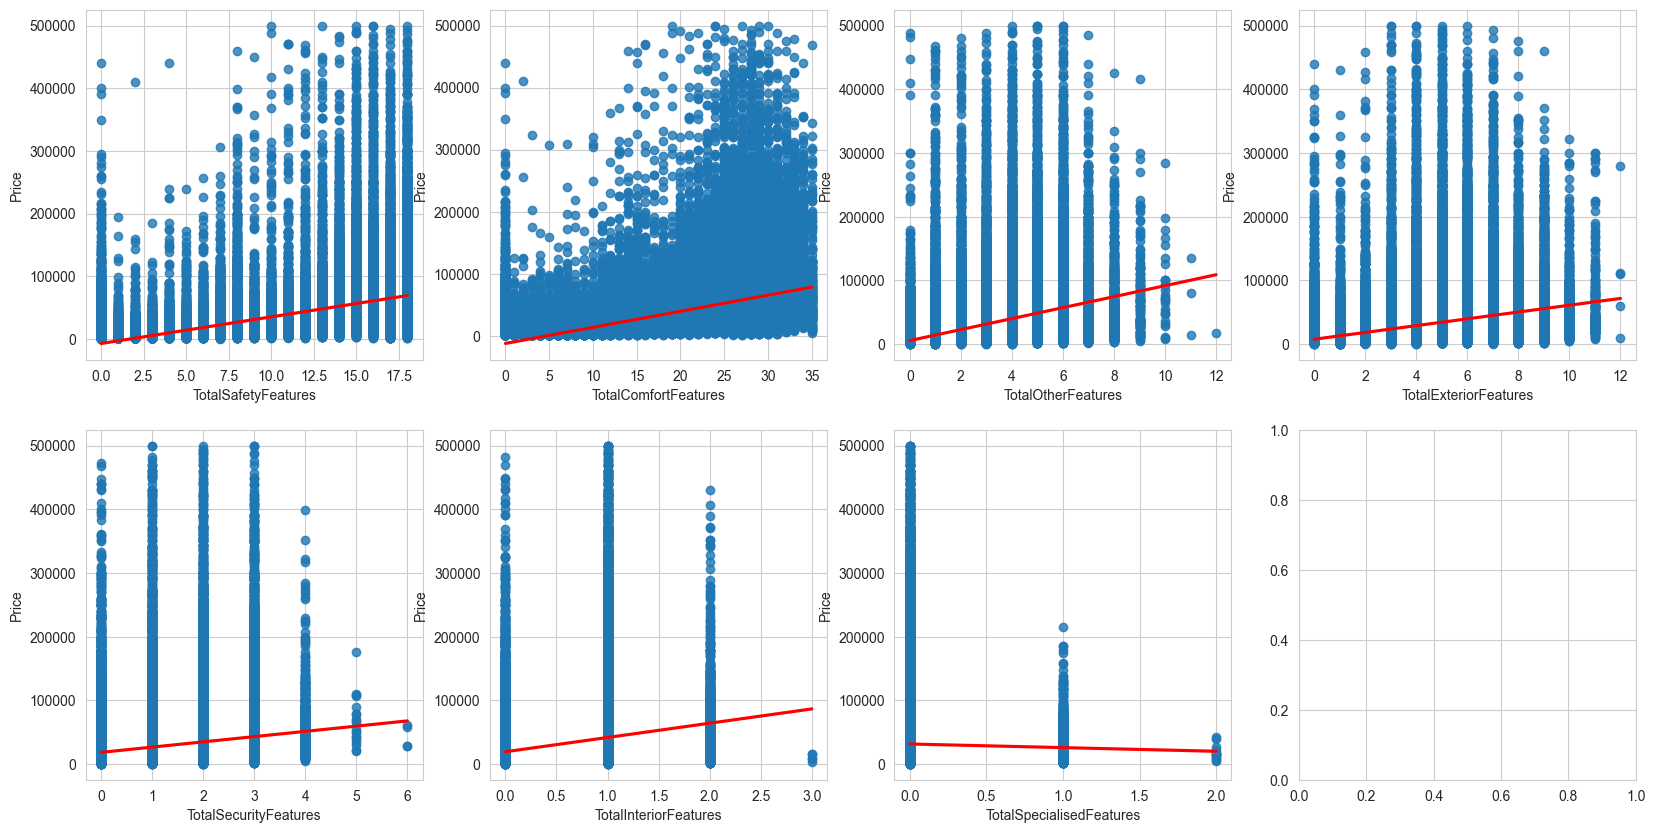

In [102]:
plt.subplots(2, 4, figsize=(20, 10))
for column in total_features_columns:
    plt.subplot(2, 4, total_features_columns.get_loc(column) + 1)
    sns.regplot(x=column, y='Price', data=df_with_total_features, line_kws={'color': 'red'})

In [103]:
df_with_total_features.describe(include='all')

Make  Model BodyType FuelType Transmission  EngineSize  \
count           82389  82389    82389    82389        82389    63572.00   
unique             99   1279       10        5            3         NaN   
top     Mercedes-Benz   Golf     Джип  Дизелов  Автоматична         NaN   
freq            11157   2013    22064    45055        43534         NaN   
mean              NaN    NaN      NaN      NaN          NaN     2177.60   
std               NaN    NaN      NaN      NaN          NaN      838.23   
min               NaN    NaN      NaN      NaN          NaN      500.00   
25%               NaN    NaN      NaN      NaN          NaN     1600.00   
50%               NaN    NaN      NaN      NaN          NaN     2000.00   
75%               NaN    NaN      NaN      NaN          NaN     2500.00   
max               NaN    NaN      NaN      NaN          NaN     8277.00   

        Horsepower EuroStandard   Mileage  MilesPerFullCharge (EV)  \
count     82389.00        67591  82389.00                  2319.00   
unique         NaN            6       NaN                      NaN   
top            NaN       Евро 6       NaN                      NaN   
freq           NaN        23925       NaN                      NaN   
mean        183.83          NaN 173648.30                   330.33   
std         106.51          NaN  82224.77                   185.52   
min          10.00          NaN      1.00                    15.00   
25%         112.00          NaN 126000.00                   150.00   
50%         150.00          NaN 181500.00                   350.00   
75%         224.00          NaN 223500.00                   472.00   
max         800.00          NaN 700000.00                   881.00   

        BatteryCapacity (EV)  Color     Price Region  \
count                2319.00  80084  82389.00  82387   
unique                   NaN     41       NaN     28   
top                      NaN  Черен       NaN  София   
freq                     NaN  21890       NaN  30160   
mean                   54.52    NaN  31597.98    NaN   
std                    31.47    NaN  46212.21    NaN   
min                     1.00    NaN    600.00    NaN   
25%                    25.70    NaN   8399.00    NaN   
50%                    52.00    NaN  15900.00    NaN   
75%                    80.85    NaN  34000.00    NaN   
max                   120.00    NaN 499999.00    NaN   

        SafetyFeatures_GPS система за проследяване  \
count                                     82389.00   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                          0.23   
std                                           0.42   
min                                           0.00   
25%                                           0.00   
50%                                           0.00   
75%                                           0.00   
max                                           1.00   

        SafetyFeatures_Автоматичен контрол на стабилността  \
count                                            82389.00    
unique                                                NaN    
top                                                   NaN    
freq                                                  NaN    
mean                                                 0.56    
std                                                  0.50    
min                                                  0.00    
25%                                                  0.00    
50%                                                  1.00    
75%                                                  1.00    
max                                                  1.00    

        SafetyFeatures_Адаптивни предни светлини  \
count                                   82389.00   
unique                                       NaN   
top                                          NaN   


## Експортиране на обработените данни

In [104]:
df_with_total_features.to_csv('../data/prepared-car-offers.csv', index=False)